In [1]:
import sys
import numpy as np
from scipy import optimize

from f import StewartPlatform

In [2]:
system = StewartPlatform(
    x1=5,
    x2=0,
    y2=6,
    L1=3,
    L2=3 * np.sqrt(2),
    L3=3,
    gamma=np.pi / 4,
    p1=5,
    p2=7,
    p3=3,
)

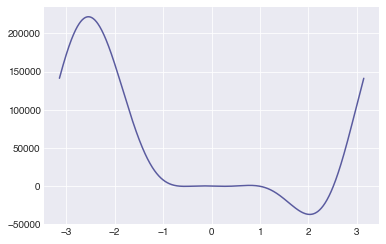

In [3]:
system.plot()

In [62]:
import numpy as np
from itertools import tee
from scipy import optimize

from multiprocessing import Pool
from collections import namedtuple

def pairwise(iterable):
    "s -> (s0,s1), (s1,s2), (s2, s3), ..."
    a, b = tee(iterable)
    next(b, None)
    return zip(a, b)

def find_zero_crossings(f, n=1000, lower_bound=-np.pi, upper_bound=np.pi):
    iterable = ((f(x), x) for x in np.linspace(lower_bound, upper_bound, num=n))

    for (a, x1), (b, x2) in pairwise(iterable):
        if np.sign(a) != np.sign(b):
            yield x1, x2

def find_zeros(f, n=1000, lower_bound=-np.pi, upper_bound=np.pi):
    crossings = find_zero_crossings(f, n=n, lower_bound=lower_bound, upper_bound=upper_bounds)
    return [optimize.bisect(system.f, a, b) for a, b in crossings]

def draw_system(system):
    zeros = find_zeros(system.f)
    
    points = [{'x': zero, 'symbol': '*', 'label': f'$x_{i+1} = {system.f(zero):.4e}$'} for i, zero in enumerate(zeros)]
    system.plot(points)
    system.draw(*zeros, rows=int(np.sqrt(len(zeros))) or None)


Result = namedtuple('Result', ('x', 'n_crossings'))
def find_zero_crossings_for_p2(x):
    print(x)
    test_system = StewartPlatform(
        x1=5,
        x2=0,
        y2=6,
        L1=3,
        L2=3 * np.sqrt(2),
        L3=3,
        gamma=np.pi / 4,
        p1=5,
        p2=x,
        p3=3,
    )
    crossings = list(find_zero_crossings(test_system.f, n=500))
    return Result(x, len(crossings))




#draw_system(system)



In [63]:
brute_force_ranges()


AttributeError: Can't pickle local object 'brute_force_ranges.<locals>.process'

In [41]:
for p2 in np.linspace(1, 30, num=30):
    test_system = StewartPlatform(
        x1=5,
        x2=0,
        y2=6,
        L1=3,
        L2=3 * np.sqrt(2),
        L3=3,
        gamma=np.pi / 4,
        p1=5,
        p2=1,
        p3=3,
    )
    if len(list(find_zero_crossings(system2.f))) == 2:
        print(p2)


